# Semana 2, tarea 9 


In [42]:
# Evaluar Mann-Whitney U para DIC y temperatura, con diagramas de caja y violín

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [43]:
df = pd.read_csv("Terminos_lagoon_TA_DIC_2023_RawData.csv")

In [44]:
dic_col = "dic_micromol_kg"
temp_col = "temp_c"
group_col = "estuary"

In [45]:
grupos = df[group_col].dropna().unique()
grupoA, grupoB = grupos[:2]  
print(f"Comparando grupos: {grupoA} vs {grupoB}")

Comparando grupos: Candelaria vs Palizada



=== dic_micromol_kg ===
Medianas: Candelaria=2625.00, Palizada=2685.00
Mann-Whitney U=1193.500, p-valor=0.1845
Tamaño de efecto (r)=-0.150


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2756\97185617.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=d, x=group_col, y=value_col, order=[gA, gB],


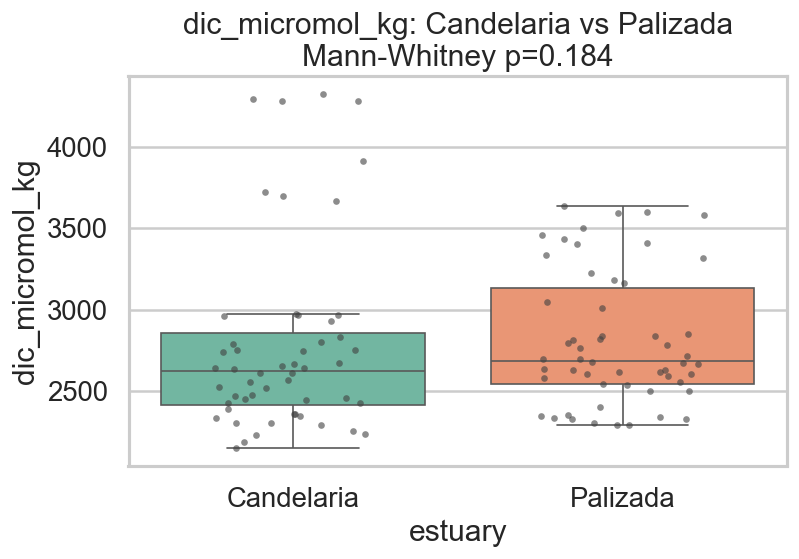

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2756\97185617.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=d, x=group_col, y=value_col, order=[gA, gB],


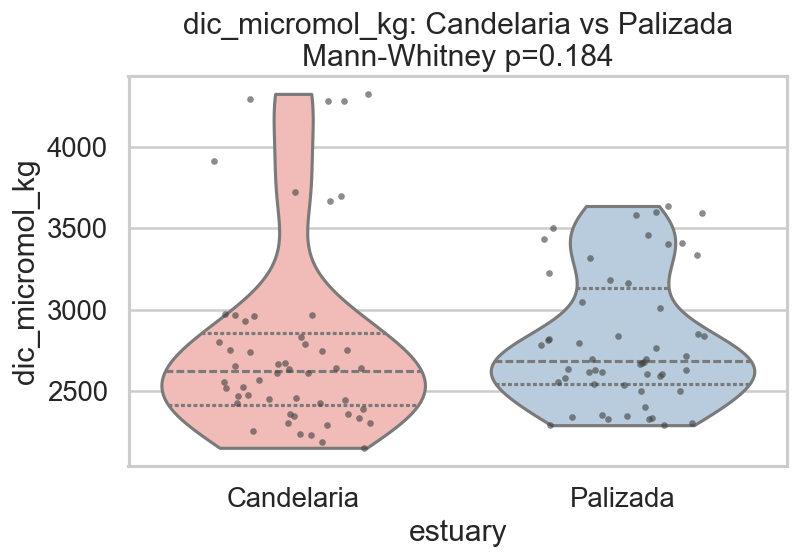


=== temp_c ===
Medianas: Candelaria=26.89, Palizada=26.79
Mann-Whitney U=1641.500, p-valor=0.1342
Tamaño de efecto (r)=-0.169


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2756\97185617.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=d, x=group_col, y=value_col, order=[gA, gB],


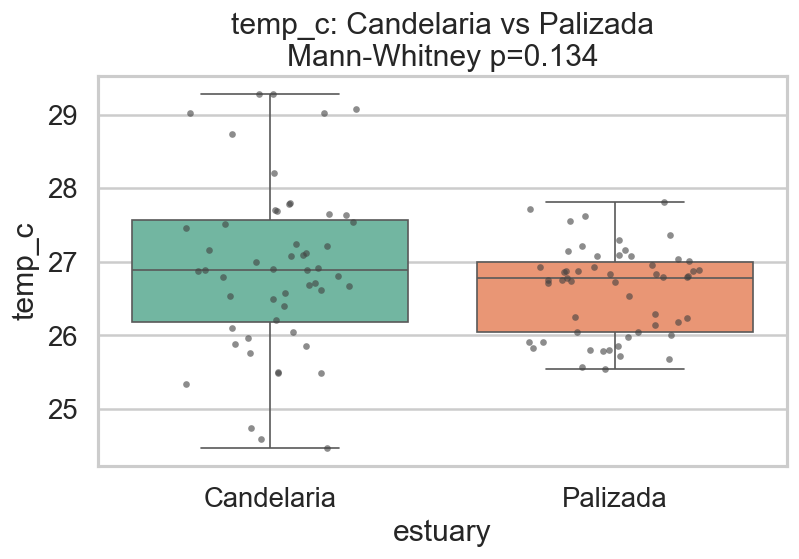

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2756\97185617.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=d, x=group_col, y=value_col, order=[gA, gB],


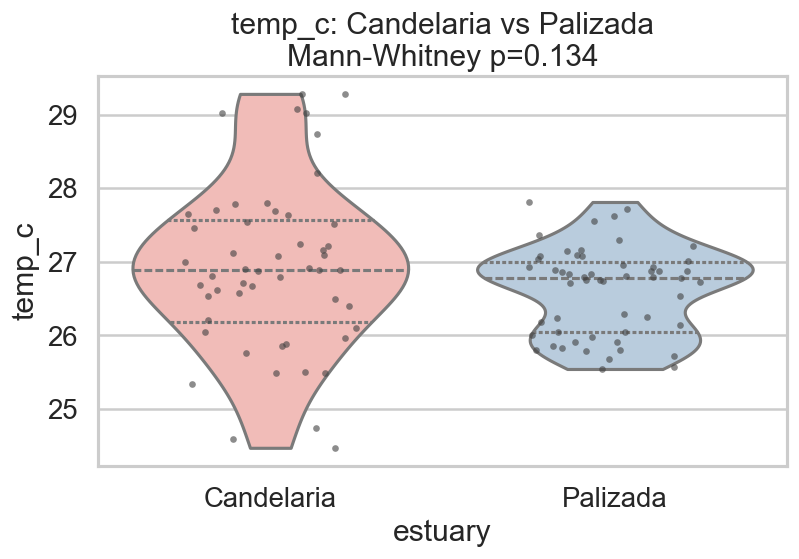

In [ ]:
def mann_whitney_analysis(data, value_col, gA, gB, group_col):
    # Subconjunto de datos
    d = data[[value_col, group_col]].dropna()
    d = d[d[group_col].isin([gA, gB])]

    xA = d.loc[d[group_col]==gA, value_col]
    xB = d.loc[d[group_col]==gB, value_col]

    # Prueba Mann-Whitney U (dos colas)
    U, p = mannwhitneyu(xA, xB, alternative="two-sided")

    # Tamaño de efecto (rank-biserial)
    medA, medB = np.median(xA), np.median(xB)
    direction = 1 if medA >= medB else -1
    r_rb = (1 - 2*U/(len(xA)*len(xB))) * direction

    print(f"\n=== {value_col} ===")
    print(f"Medianas: {gA}={medA:.2f}, {gB}={medB:.2f}")
    print(f"Mann-Whitney U={U:.3f}, p-valor={p:.4f}")
    print(f"Tamaño de efecto (r)={r_rb:.3f}")

    # Boxplot 
    plt.figure(figsize=(7,5), dpi=120)
    sns.boxplot(data=d, x=group_col, y=value_col, order=[gA, gB],
                palette="Set2", showfliers=False)
    sns.stripplot(data=d, x=group_col, y=value_col, order=[gA, gB],
                  alpha=0.6, color=".25", size=4, jitter=0.25)
    plt.title(f"{value_col}: {gA} vs {gB}\nMann-Whitney p={p:.3f}")
    plt.tight_layout()
    plt.show()

    # --- Violin plot ---
    plt.figure(figsize=(7,5), dpi=120)
    sns.violinplot(data=d, x=group_col, y=value_col, order=[gA, gB],
                   inner="quart", palette="Pastel1", cut=0)
    sns.stripplot(data=d, x=group_col, y=value_col, order=[gA, gB],
                  alpha=0.6, color=".25", size=4, jitter=0.25)
    plt.title(f"{value_col}: {gA} vs {gB}\nMann-Whitney p={p:.3f}")
    plt.tight_layout()
    plt.show()

#  Ejecutar para DIC y temperatura 
mann_whitney_analysis(df, dic_col, grupoA, grupoB, group_col)
mann_whitney_analysis(df, temp_col, grupoA, grupoB, group_col)

## Para el carbono inorgánico disuelto (DIC)
- Candelaria: mediana = 2625 µmol/kg
- Palizada: mediana = 2685 µmol/kg 
La diferencia de mediana es muy pequeña. 

### Prueba de Mann–Whitney U
- p-valor = 0.1845, mayor a 0.05
Por lo tanto no se rechaza la hipótesis nula, no hay evidencia estadística significativa de que la distribución del carbono inorgánico disuelto difiera entre los dos estuarios, Candelaria y Palizada, con un efecto pequeño (r=-0.15)

## Para la temperatura 
- Candelaria: mediana = 26.89 °C
- Palizada: mediana = 26.79 °C
La diferencia es prácticamente despreciable en términos ambientales. 

### Prueba de Mann–Whitney U
- p-valor = 0.1342, mayor a 0.05
Por lo tanto se rechaza la hipótesis nula, no hay evidencia estadística significtiva de que haya diferencias en la temperatura entres ambos estuarios, con un efecto pequeño (r=0.17). 